# Communicate Data Findings: 2019 Ford Go-Bike Project
### Udacity DataAnalysis NanoDegree Feb-2021
### Prepared By: Amr Ibrahim (amr.ibrahim2011@gmail.com)

## Introduction
Ford GoBike, the San Francisco Bay Area’s new regional bike share network, is a public-private partnership between the Metropolitan Transportation Commission and Motivate. Motivate, the global leader in bike share, operates tens of thousands of bikes across four continents. Ford Motor Company is the program’s title partner, whose support enables Ford GoBike to bring the myriad public benefits of state-of-the-art bike share to San Francisco, San Jose, Oakland, Berkeley and Emeryville — at no cost to taxpayers for capital or operational expenditures

The 2019 Ford Go-Bike DataSet includes information about individual rides made in this bike-sharing system covering the greater San Francisco Bay area. There are many cities covered by the full dataset and also there are data available for previuos years howerver, I will focus my study on 2019 and on San Francisco Bay area.

In [81]:
# importing the required libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [82]:
# Reading the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [84]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

The dataset contains 183215 observations, and has 14 columns focusing on the bike trip details; the trip duration, start and end times, start and end stations info, and some informations related to the users.  Most of the variables are numerical (9 Variables), 7 object type.

### What is/are the main feature(s) of interest in your dataset?

The Trip duration might be the main feature of interest of this dataset, as it's for sure affect the revenue of the company, that's why I will study on this analysis the effect of other factors like user_type, trip start and end times, gender and age on the trip duration.  


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- User_type either customer or subscriber should have affect on the trip duration.
- Gender and Age of the users should also have affect on the trip duration.
- When are most trips taken in terms of time of day, day of the week, or month of the year?


# Data Wrangling Process

In [85]:
# checking for the null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [86]:
# as long as there is no replacement values for the missing stations IDs or names, so it's better to remove them.
# Also it's better to remove the Nan Values of the memebr birth year and member gender, they are 8265 missing observations 
# which are 4.5% of the whole dataset, so this will be a trivial effect on the dataset.
df.dropna(axis = 0 , inplace = True)

In [87]:
# checking the null values after the dropping.
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [88]:
# checking the new shape of the dataframe.
df.shape

(174952, 16)

In [89]:
# Checking the unique values
df.nunique()

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [90]:
# checking if there is any duplicates on the dataframe
df.duplicated().sum()

0

In [91]:
# checking the data type of each column of the dataset
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [92]:
# converting the start_time and end_time to datetime type format
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [93]:
# change the user_type data to category data
df['user_type'] = df['user_type'].astype('category')

In [94]:
# change the data type for bike_share_for_all_trip to be bool
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [95]:
# start_station_id, end_station_id and bike_id should be object data type not numerical variables
df['start_station_id'] = df['start_station_id'].astype('object')
df['end_station_id'] = df['end_station_id'].astype('object')
df['bike_id'] = df['bike_id'].astype('object')

In [96]:
#checking dtypes 
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip              bool
dtype: object

In [97]:
# Extract start_time_month and dayofweek, information from the start_time
df['start_time_dayofweek']= df['start_time'].dt.strftime('%a')
df['start_time_month'] = df['start_time'].dt.strftime('%B')

In [98]:
# For Easier Analysis of the trip duration, let's change the duration_sec to duration_min
df['duration_min'] = df['duration_sec'] / 60

In [99]:
# I'm thinking of extract the start_time and end_time hour, but before let's have a look on the distrubtion of the duration_min
# to verify the importance of this step.
df['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [100]:
# Looks like for at least 75% of the data are less than one hour, so end_time_hour will not be important.
# Extract Start_time_hourfrom start_time information
df['start_time_hour']= df['start_time'].dt.hour

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [102]:
# It's noticed that the start_time_dayofweek is object type, for better analysis, we should convert it to Category datatype
weekdays = ['Fri','Sat','Sun','Mon','Tue','Wed','Thu']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['start_time_dayofweek'] = df['start_time_dayofweek'].astype(ordered_weekdays)

In [103]:
# checking the unique values of the start_time_month
df['start_time_month'].unique()

# Seems that all the trips of study happened at one month which is February, so the month will not a factor of study.

array(['February'], dtype=object)

In [104]:
# The timestamp double proof of the fact that all trips record for this dataset happended at February
df['start_time'].max() , df['start_time'].min()

(Timestamp('2019-02-28 23:59:18.548000'),
 Timestamp('2019-02-01 00:00:20.636000'))

In [105]:
# No more need for the duration_sec column, will drop it
df= df.drop('duration_sec' , axis = 1)

In [106]:
# Birth Year column is not important data to alanyze, but we can get the member age from this column to study the relationship
# of the member age with the duration time and other factors, we will use 2019 to calculate the member age as this data belongs 
# to 2019 dataset.
df['member_age'] = 2019 - df['member_birth_year']

In [107]:
# Changing the dtype of both member_birth_year and member_age to int datatype.
df['member_age'] = df['member_age'].astype(int)
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [108]:
# Checking All the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  object        
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_id           174952 non-null  object        
 7   end_station_name         174952 non-null  object        
 8   end_station_latitude     174952 non-null  float64       
 9   end_station_longitude    174952 non-null  float64       
 10  bike_id                  174952 non-null  object        
 11  user_type                174952 non-null  category      
 12  member_birth_yea

In [109]:
df.head(3)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_month,duration_min,start_time_hour,member_age
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False,Thu,February,869.750000,17,35
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False,Thu,February,1030.900000,12,47
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False,Thu,February,608.166667,17,30


## Univariate Exploration

> Let's start looking deeply into the main feature of interest which is the trip duration (duration_min).

In [110]:
df['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

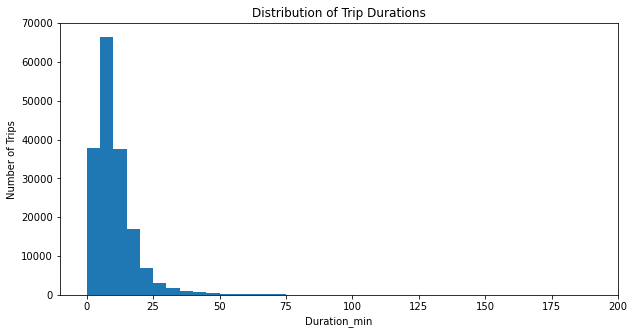

In [111]:
# plotting the duration_min data on a normal scale
binsize = 5
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_min')
plt.ylabel('Number of Trips')
plt.axis([-10, 200, 0, 70000])
plt.show()

# Observed a long tail of the distribution.

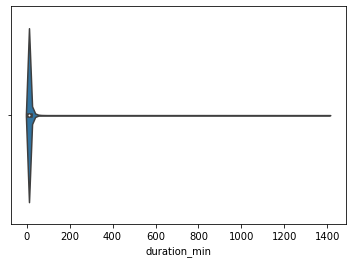

In [112]:
# using violinplot to have a second look of the distribution
sb.violinplot(data = df, x = 'duration_min');

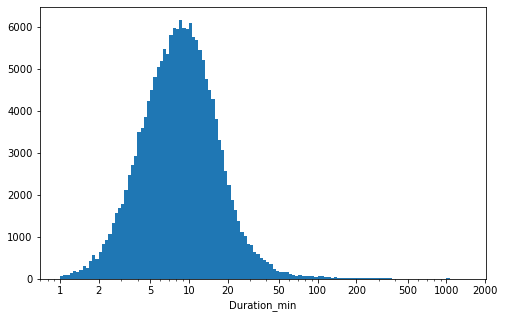

In [113]:
# Due to this long tail of the distribution, it's better to use the log scale to visulaize the duration_min.
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration_min');


# The distribtion now looks like a normal distribtion but still we have long tail, we can remove it

In [114]:
# Removing the tail of the duration_min data
duration_min_100more = df[df['duration_min']> 100]
duration_min_100more['duration_min'].describe()

count     703.000000
mean      301.537174
std       290.643431
min       100.216667
25%       122.100000
50%       168.400000
75%       331.091667
max      1409.133333
Name: duration_min, dtype: float64

In [115]:
duration_min_120more = df[df['duration_min']> 120]
duration_min_120more['duration_min'].describe()

count     538.000000
mean      360.694641
std       309.001370
min       120.016667
25%       148.320833
50%       218.733333
75%       436.104167
max      1409.133333
Name: duration_min, dtype: float64

In [116]:
# through the last investigation of the duration_min, I would choose 120 as a cut point for trimming the 
# duration_min data
df = df [df['duration_min'] <=120]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174414 entries, 4 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174414 non-null  datetime64[ns]
 1   end_time                 174414 non-null  datetime64[ns]
 2   start_station_id         174414 non-null  object        
 3   start_station_name       174414 non-null  object        
 4   start_station_latitude   174414 non-null  float64       
 5   start_station_longitude  174414 non-null  float64       
 6   end_station_id           174414 non-null  object        
 7   end_station_name         174414 non-null  object        
 8   end_station_latitude     174414 non-null  float64       
 9   end_station_longitude    174414 non-null  float64       
 10  bike_id                  174414 non-null  object        
 11  user_type                174414 non-null  category      
 12  member_birth_yea

In [117]:
df['duration_min'].describe()

count    174414.000000
mean         10.656968
std           8.981459
min           1.016667
25%           5.366667
50%           8.483333
75%          13.083333
max         119.566667
Name: duration_min, dtype: float64

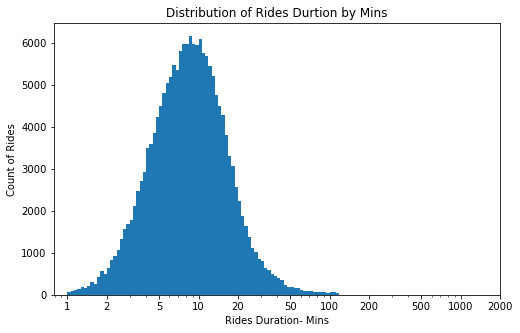

In [118]:
# Redrawing the histogram after data trimming
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.title('Distribution of Rides Durtion by Mins')
plt.xlabel('Rides Duration- Mins')
plt.ylabel('Count of Rides')
plt.show()

# Looks better

### Let's check the start_time_hour data

In [119]:
base_color = sb.color_palette()[0]

In [120]:
hour_order = df['start_time_hour'].value_counts().index

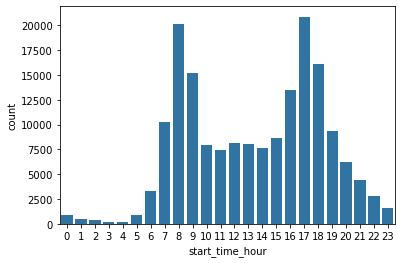

In [121]:
sb.countplot(data = df , x= 'start_time_hour', color = base_color);

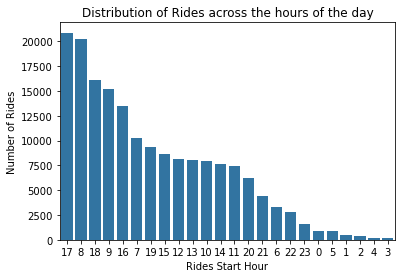

In [122]:
# We can see the order here
sb.countplot(data = df , x= 'start_time_hour', color = base_color, order = hour_order);
plt.title('Distribution of Rides across the hours of the day')
plt.xlabel('Rides Start Hour')
plt.ylabel('Number of Rides')
plt.show()

#### Peak hours for riding is 5 P.M and 8 A.M (Those two hours are matching closely with the normal working hours for riders)

### Let's now know which day of the week we have the most rides.

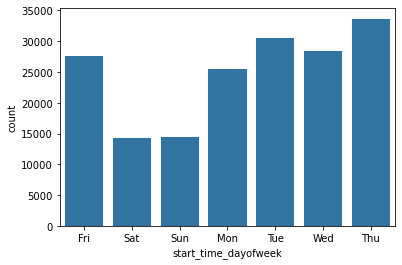

In [123]:
sb.countplot(data = df, x = 'start_time_dayofweek', color = base_color);

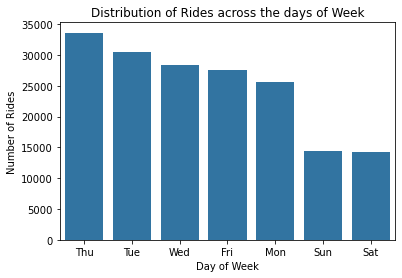

In [124]:
dow_order = df['start_time_dayofweek'].value_counts().index
sb.countplot(data = df, x = 'start_time_dayofweek', color = base_color, order = dow_order);
plt.title('Distribution of Rides across the days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.show()

#### It's very obvious that the bikers have higher rides at the day of work more than the weekend. We can notice that Thursday is the highest day of rides but the other work days are close to it.

## Now Let's pay more attention to the bikers themselves, their gender, their age and also the user_type 

## 1-Bikers' Gender

In [125]:
df['member_gender'].value_counts()

Male      130151
Female     40646
Other       3617
Name: member_gender, dtype: int64

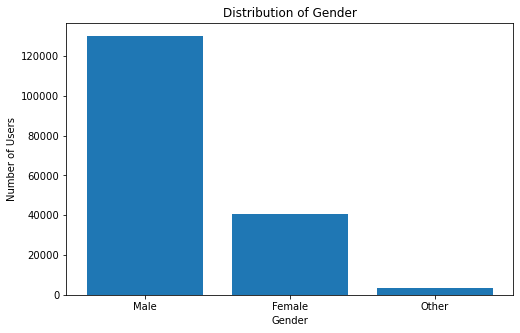

In [126]:
# plotting genders 
plt.figure(figsize=[8,5])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

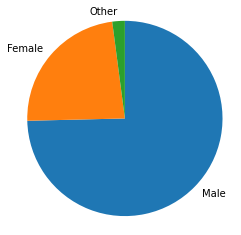

In [127]:
# We can see the gender also on the pie chart
sorted_counts = df['member_gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

plt.axis('square');

#### We can conclude that Male Bikers are almost 3 times the female bikers.

## 2- Bikers' Age

In [128]:
df['member_age'].value_counts()

31     10190
26      9312
30      8901
29      8613
28      8462
       ...  
92         1
91         1
109        1
89         1
141        1
Name: member_age, Length: 75, dtype: int64

In [129]:
df['member_age'].describe()

# Age 141 is not usual and it's certainly outlier

count    174414.000000
mean         34.194268
std          10.119777
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

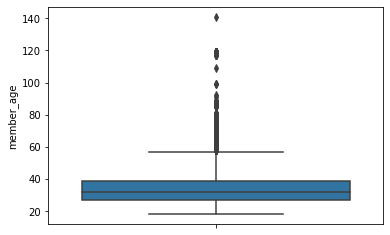

In [130]:
sb.boxplot(data = df, y = 'member_age');

In [131]:
# from the box plot, I can use age 60 a acut point but I have found that the deleated observations will be over 3000 observations
# So I have decided to use Age 80 as a cut point, 192 observations only be deleted as outliers.
age_olderthan80 = df[df['member_age'] > 80]
age_olderthan80 ['member_age'].describe()

# we will trim the data using the Age 60 as a cut point, they are only 192 observations out of 174414 observations (0.11% only)

count    192.000000
mean      99.406250
std       15.261818
min       81.000000
25%       88.000000
50%       88.000000
75%      119.000000
max      141.000000
Name: member_age, dtype: float64

In [132]:
df = df[df['member_age'] <= 80]

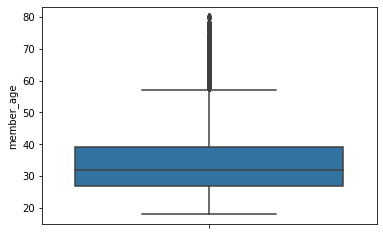

In [133]:
sb.boxplot(data = df, y = 'member_age');

In [134]:
df['member_age'].describe()

count    174222.000000
mean         34.122401
std           9.878039
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          80.000000
Name: member_age, dtype: float64

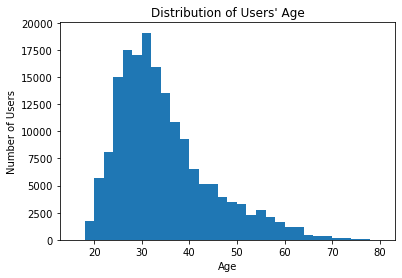

In [135]:
binsize = 2
bins = np.arange(16, df['member_age'].max()+binsize, binsize)
plt.hist(data = df, x = 'member_age', bins = bins);
plt.title("Distribution of Users' Age")
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

#### Using this distribution, we can conclude that the major age range of bikers are 25-35.

## 3. Bikers Type 

In [136]:
df['user_type'].value_counts()

Subscriber    157928
Customer       16294
Name: user_type, dtype: int64

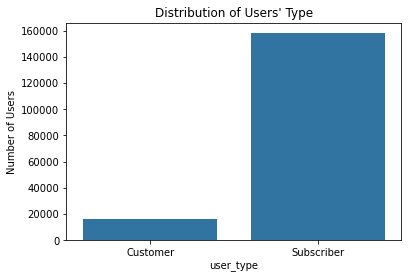

In [137]:
sb.countplot(data = df, x = 'user_type', color = base_color);
plt.title("Distribution of Users' Type")
plt.xlabel('user_type')
plt.ylabel('Number of Users')
plt.show()

#### It's very clear that the subscriber users are around 9-10 times the customer users, this indicates long relationship and satisfactions from the users with the services provided to them. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The feature of interest was the trip duration, and we can conclude that the users used the biking system for a wide range of trip duration, and after cleaning the trip duration data and removing the outliers, we have found that the major trips had a trip duration on average of 7-12 mins.

> The duration_min data were not showing a proper distribution while we were plotting them on the linear scale, that's why I have plot them on the logarithmic scale to have the proper distribution.   

> Also we have found that the work days were the most days that the users use the bike share system specially Thursday for this study.

> Also we have found that the peak hours for the users were 8 A.M and 5 P.M and those two hours are closely matching with the regular start and end working hours for most of the companies.
> Regarding the users, we have found that the males are almost 3 times the female users, the most age range is 25-35 and the subscriber users are almost 9-10 times the customer users.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The tripping duration was initially at seconds but I have converted them to minutes for easier analysis. The duration_min distribution had outliers so I have removed them based on 120 mins as a cut point after studying the effect of these cut data on the whole datset.

> The hour of the day and the day of the week were extracted from the timestamp.

> The age of the users is calculated using the member_birth_year.

### Saving the cleaned Dataset

In [138]:
# Before moving to the Bivariate Exploration, we need to store the cleaned dataset on a new csv file so that we can read it
# directly to the slides notebook without the need of repeating the cleaning process
df.to_csv('clean_2019fordgobike.csv', index=False)

>

# Bivariate Exploration

> 

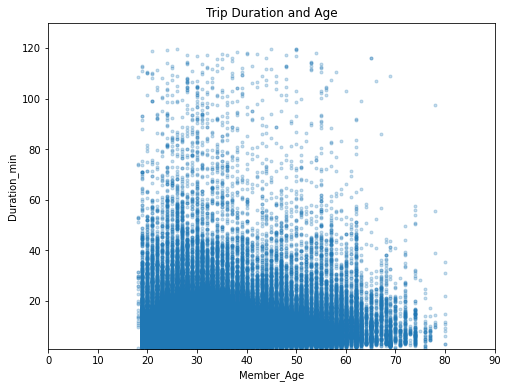

In [139]:
plt.figure(figsize=[8,6])
plt.scatter(df['member_age'], df['duration_min'], alpha = 0.25, marker = '.' )
plt.axis([0, 90, 1, 130])
plt.title('Trip Duration and Age')
plt.xlabel('Member_Age')
plt.ylabel('Duration_min')
plt.show()


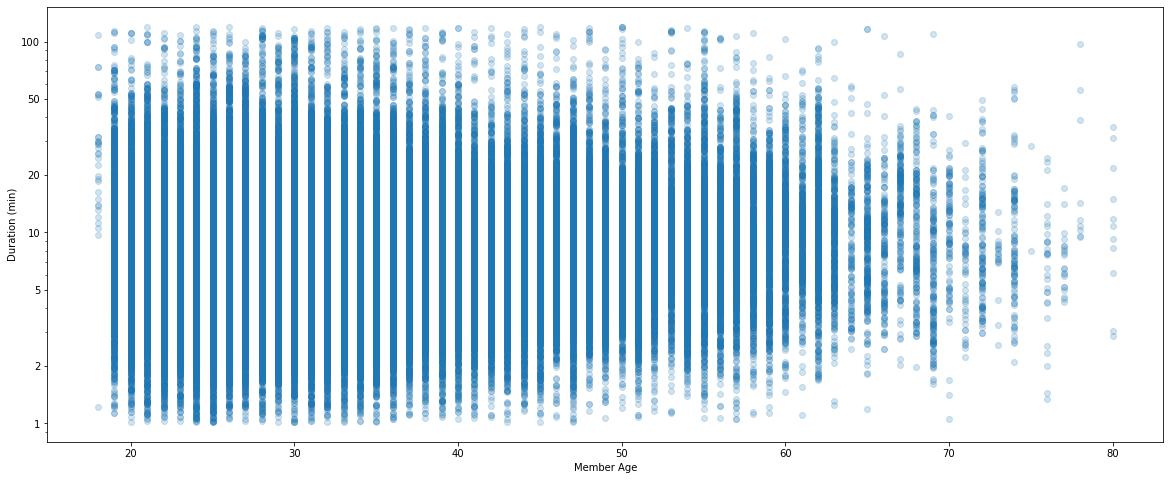

In [140]:
# scatter plot of duration_min vs. member_age, with log transform on duration_min axis
plt.figure(figsize=[20,8])
plt.scatter(data = df, x = 'member_age', y = 'duration_min', alpha = 0.2);
#plt.xlim([0, 3.5])
plt.xlabel('Member Age');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.ylabel('Duration (min)');

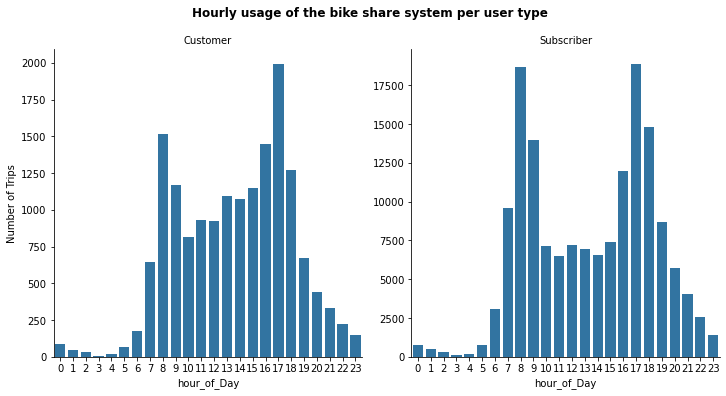

In [141]:
# Analysis of the number of trips taken by different user types across a hour of the day

user_type_hourofday = sb.catplot(data=df, x='start_time_hour', col="user_type", kind='count', sharey = False, color = base_color)
user_type_hourofday.set_axis_labels("hour_of_Day", "Number of Trips")
user_type_hourofday.set_titles("{col_name}")
user_type_hourofday.fig.suptitle('Hourly usage of the bike share system per user type', y=1.05, fontsize=12, fontweight='semibold');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As mentioned earlier, the main focus of interest of this study is the trip timing, so I have studied the trip duration with the member age, and also I have studied the the rush hour usage across the day for both user types; the subscriber and the customer.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes I have observed interesting relationships, for the duration_min vs the member age, I have concluded that from age 20 to 40, the duration of major trips was ranging between 2 mins to 30 mins and the trip duration range is narrowing as the age increased, this is obviously described with the duration_min vs age on the log scale as it looks like a horizontal cone which tends to narrow as the age of the member increased.

> For the rush hour of the of the day vs the user type, I have found that the rush hours for both user types are 5 P.M and 8 A.M and those two rush hours are matching with the rush hours of whole dataset which was investigated at the univariate visualization earlier but obviously the number of trips for subscriber users at those two hours are larger than same two hours for the customer users.

>
# Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the two categoties of user type are related to the trip duration and member age

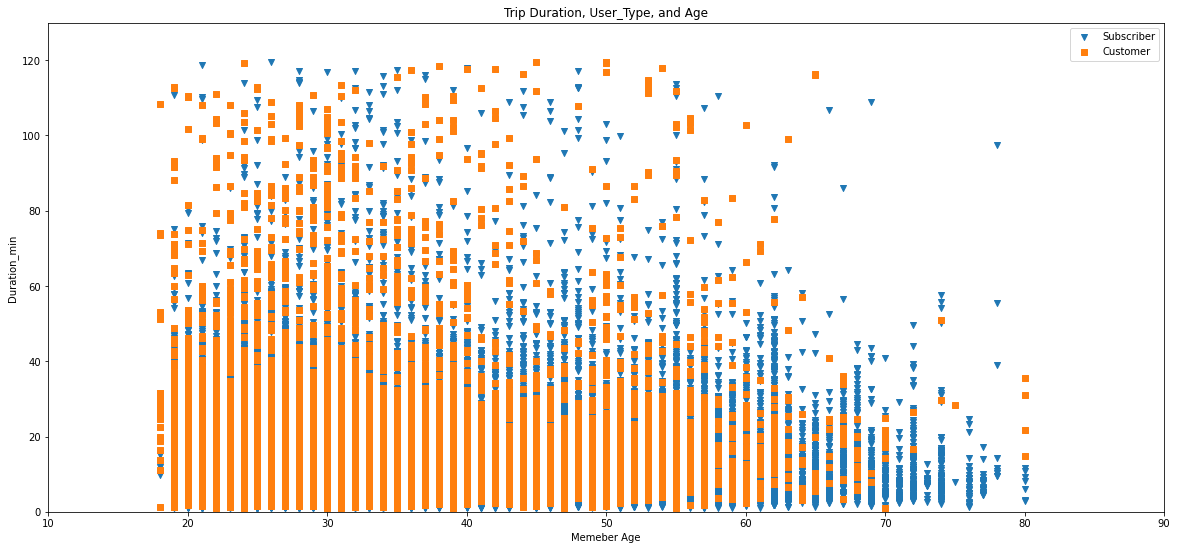

In [144]:

plt.figure(figsize=[20,9])
usertype_mark = [['Subscriber', 'v'],['Customer', 's']]

for user_type, marker in usertype_mark:
    df_usertype = df[df['user_type'] == user_type]
    plt.scatter(df_usertype['member_age'], df_usertype['duration_min'], marker = marker, alpha= 1)
plt.legend(['Subscriber','Customer'])
plt.axis([10, 90, 0, 130 ])
plt.title('Trip Duration, User_Type, and Age')
plt.xlabel('Memeber Age')
plt.ylabel('Duration_min')
plt.show()

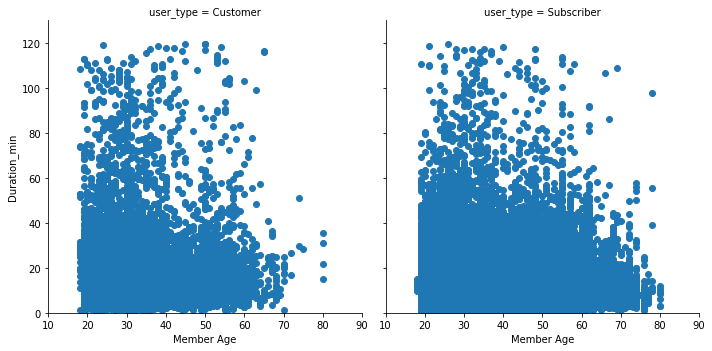

In [145]:
user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, height = 5, xlim = [10, 90], ylim = [0, 130])
user_type.map(plt.scatter, 'member_age', 'duration_min', alpha= 1)

user_type.set_xlabels('Member Age')
user_type.set_ylabels('Duration_min')

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We have concluded earlier that the number of subscriber is 9-10 times the number of customers as a count but in this analysis we have found an interesting results that the subscribers users have higher age range than the customers users.

### Were there any interesting or surprising interactions between features?

> The interesting results is shown by the plot is that the subscribers users are using the bikeshare system for longer duration and also covering higher age range, and this is an indication of long relationship between the clients and the bikeshare company.

# Resources

- https://www.motivateco.com/ford-gobike-bike-share-system-passes-growth-milestones/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html
- https://julienbeaulieu.gitbook.io/wiki/sciences/programming/jupyter
